## 1. 필요한 패키지 로드

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

import glob

from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
import random

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [2]:
path = 'C:/Users/user/Desktop/16017005/Airline' #파일 경로 지정

In [3]:
import os
os.listdir(path)

['.ipynb_checkpoints',
 'Airline.csv',
 'Airline_Experiment(EDA).ipynb',
 'Airline_Experiment.ipynb',
 'Airline_Experiment_DataModeling(Categorical).ipynb',
 'Airline_Experiment_DataModeling(Numerical)-sklearn.ipynb',
 'Airline_Experiment_DataModeling(Numerical, Pycaret).ipynb',
 'Airline_revised.csv',
 'catboost_info',
 'logs.log']

## 2. 파일 불러오기

In [4]:
data = pd.read_csv(path+'/Airline_revised.csv' ,engine='python',encoding='CP949')

In [5]:
import pandas as pd
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
data.head()

,Unnamed: 0,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Delay,Gender_Male,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Customer Type_disloyal Customer,satisfaction_satisfied
0,2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,0,0,0,0,0,1
1,3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,1.0,0,0,0,0,0,0
2,4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,0,0,0,0,1
3,5,26,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0.0,0,1,1,0,0,0
4,6,47,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,1.0,1,1,1,0,0,0


In [6]:
data.drop(["Unnamed: 0"], axis=1, inplace=True) #필요없는 칼럼 삭제
data

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Delay,Gender_Male,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Customer Type_disloyal Customer,satisfaction_satisfied
0,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,0,0,0,0,0,1
1,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,1.0,0,0,0,0,0,0
2,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,0,0,0,0,1
3,26,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0.0,0,1,1,0,0,0
4,47,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,1.0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103587,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,1.0,0,0,1,0,1,0
103588,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0.0,1,0,0,0,0,1
103589,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,1.0,1,0,0,0,1,0
103590,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0.0,0,0,1,0,1,0


## 3. 추가적인 데이터 전처리

#### 5점제 리커트 척도 항목에서 0점(N/A)으로 대답한 응답자를 삭제 후, Numerical로 처리.

In [8]:
A = data[data['Departure/Arrival time convenient'] != 0]
A = A[A['Ease of Online booking'] != 0]
A = A[A['Gate location'] != 0]
A = A[A['Food and drink'] != 0]
A = A[A['Online boarding'] != 0]
A = A[A['Seat comfort'] != 0]
A = A[A['Inflight entertainment'] != 0]
A = A[A['On-board service'] != 0]
A = A[A['Leg room service'] != 0]
A = A[A['Baggage handling'] != 0]
A = A[A['Checkin service'] != 0]
A = A[A['Inflight service'] != 0]
A = A[A['Cleanliness'] != 0]

A


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Delay,Gender_Male,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Customer Type_disloyal Customer,satisfaction_satisfied
0,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,0,0,0,0,0,1
1,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,1.0,0,0,0,0,0,0
2,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,0,0,0,0,1
3,26,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0.0,0,1,1,0,0,0
4,47,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,1.0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103587,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,1.0,0,0,1,0,1,0
103588,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0.0,1,0,0,0,0,1
103589,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,1.0,1,0,0,0,1,0
103590,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0.0,0,0,1,0,1,0


In [34]:
A.to_csv("Airline_revised_Numerical.csv", mode = 'w')

## 4. Pycaret

In [9]:
!pip install pycaret

In [10]:
from pycaret.classification import *

In [11]:
clf = setup(data = A, target = 'satisfaction_satisfied', train_size=0.8, session_id = 123, numeric_features= ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'])

,Description,Value
0,session_id,123
1,Target,satisfaction_satisfied
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(95596, 23)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [33]:
from pycaret.datasets import get_data
X_test = get_config('X_test')
X_train = get_config('X_train')
Y_test = get_config('y_test')
Y_train = get_config('y_train')

test_x = get_config('X_test')
train_x = get_config('X_train')
test_y = get_config('y_test')
train_y = get_config('y_train')

x_test = get_config('X_test')
x_train = get_config('X_train')
y_test = get_config('y_test')
y_train = get_config('y_train')

validation_y = get_config('y_test')
y_validation = get_config('y_test')
validation_Y = get_config('y_test')
Y_validation = get_config('y_test')

## 5. 모형 간 성능 비교

In [13]:
best = compare_models(exclude = ['ridge', 'svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9630,0.9948,0.9405,0.9719,0.9560,0.9240,0.9244,24.7380
xgboost,Extreme Gradient Boosting,0.9627,0.9946,0.9412,0.9705,0.9556,0.9234,0.9238,5.4640
lightgbm,Light Gradient Boosting Machine,0.9625,0.9943,0.9369,0.9743,0.9552,0.9230,0.9235,0.8460
rf,Random Forest Classifier,0.9604,0.9932,0.9350,0.9713,0.9528,0.9187,0.9192,4.6440
et,Extra Trees Classifier,0.9571,0.9927,0.9311,0.9672,0.9488,0.9119,0.9124,4.4600
dt,Decision Tree Classifier,0.9432,0.9422,0.9357,0.9317,0.9337,0.8840,0.8840,0.2840
gbc,Gradient Boosting Classifier,0.9403,0.9870,0.9149,0.9437,0.9291,0.8776,0.8780,7.1250
ada,Ada Boost Classifier,0.9265,0.9762,0.9055,0.9210,0.9132,0.8494,0.8496,1.6680
lr,Logistic Regression,0.8953,0.9589,0.8792,0.8761,0.8776,0.7861,0.7861,6.9400
lda,Linear Discriminant Analysis,0.8935,0.9570,0.8795,0.8724,0.8759,0.7827,0.7827,0.2710


## 6. Catboost Training

In [14]:
model_cat = create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9616,0.9948,0.9388,0.9703,0.9543,0.9211,0.9215
1,0.9647,0.9953,0.9470,0.9696,0.9582,0.9276,0.9278
2,0.9587,0.9943,0.9385,0.9638,0.9510,0.9153,0.9155
3,0.9644,0.9951,0.9400,0.9759,0.9576,0.9270,0.9275
4,0.9650,0.9943,0.9406,0.9765,0.9582,0.9281,0.9285
5,0.9637,0.9949,0.9409,0.9731,0.9567,0.9254,0.9258
6,0.9622,0.9945,0.9403,0.9703,0.9551,0.9225,0.9228
7,0.9626,0.9951,0.9382,0.9733,0.9554,0.9232,0.9237
8,0.9630,0.9948,0.9376,0.9749,0.9558,0.9240,0.9245
9,0.9640,0.9949,0.9434,0.9716,0.9573,0.9262,0.9265


In [15]:
tuned_cat = tune_model(model_cat, n_iter = 100) #hyperparameter 튜닝

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9644,0.9952,0.9428,0.9731,0.9577,0.9270,0.9274
1,0.9659,0.9953,0.9470,0.9723,0.9595,0.9300,0.9303
2,0.9591,0.9947,0.9373,0.9659,0.9514,0.9161,0.9164
3,0.9642,0.9951,0.9394,0.9758,0.9573,0.9264,0.9269
4,0.9646,0.9944,0.9412,0.9750,0.9578,0.9273,0.9277
5,0.9631,0.9948,0.9391,0.9737,0.9561,0.9243,0.9248
6,0.9631,0.9944,0.9397,0.9731,0.9561,0.9243,0.9247
7,0.9621,0.9949,0.9366,0.9736,0.9548,0.9221,0.9226
8,0.9643,0.9949,0.9379,0.9777,0.9574,0.9267,0.9273
9,0.9653,0.9948,0.9434,0.9747,0.9588,0.9289,0.9293


In [16]:
#save_model(model_cat, 'Airline_cat_def2')

In [17]:
#save_model(tuned_cat, 'Airline_cat_tuned2')

## 7. Catboost Validation

In [19]:
predict_model(model_cat)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9629,0.9946,0.9405,0.9716,0.9558,0.9239,0.9242


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Cleanliness,Delay,Gender_Male_1,Type of Travel_Personal Travel_1,Class_Eco_1,Class_Eco Plus_1,Customer Type_disloyal Customer_1,satisfaction_satisfied,Label,Score
0,45.0,141.0,4.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,...,4.0,1.0,1.0,0.0,1.0,0.0,0.0,1,0,0.6274
1,51.0,2182.0,3.0,3.0,3.0,3.0,4.0,1.0,2.0,4.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9985
2,23.0,125.0,3.0,1.0,3.0,4.0,1.0,3.0,1.0,1.0,...,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9999
3,51.0,2029.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,3.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1,1,0.9988
4,12.0,811.0,3.0,1.0,3.0,2.0,2.0,3.0,2.0,2.0,...,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19115,27.0,819.0,4.0,2.0,4.0,2.0,3.0,4.0,3.0,3.0,...,3.0,2.0,1.0,1.0,1.0,0.0,0.0,0,0,0.8580
19116,60.0,697.0,2.0,5.0,2.0,5.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0,0.9999
19117,7.0,1605.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,...,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0,0.9999
19118,40.0,895.0,1.0,1.0,1.0,1.0,3.0,5.0,5.0,5.0,...,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0000


In [20]:
predict_model(tuned_cat)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9641,0.9949,0.9409,0.9740,0.9571,0.9262,0.9266


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Cleanliness,Delay,Gender_Male_1,Type of Travel_Personal Travel_1,Class_Eco_1,Class_Eco Plus_1,Customer Type_disloyal Customer_1,satisfaction_satisfied,Label,Score
0,45.0,141.0,4.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,...,4.0,1.0,1.0,0.0,1.0,0.0,0.0,1,0,0.6175
1,51.0,2182.0,3.0,3.0,3.0,3.0,4.0,1.0,2.0,4.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9980
2,23.0,125.0,3.0,1.0,3.0,4.0,1.0,3.0,1.0,1.0,...,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9983
3,51.0,2029.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,3.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1,1,0.9993
4,12.0,811.0,3.0,1.0,3.0,2.0,2.0,3.0,2.0,2.0,...,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19115,27.0,819.0,4.0,2.0,4.0,2.0,3.0,4.0,3.0,3.0,...,3.0,2.0,1.0,1.0,1.0,0.0,0.0,0,0,0.8998
19116,60.0,697.0,2.0,5.0,2.0,5.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0,0.9997
19117,7.0,1605.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,...,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0,0.9998
19118,40.0,895.0,1.0,1.0,1.0,1.0,3.0,5.0,5.0,5.0,...,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0000


## 8. Random Forest

In [21]:
model_rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9630,0.9939,0.9376,0.9749,0.9558,0.9240,0.9245
1,0.9642,0.9938,0.9452,0.9702,0.9575,0.9266,0.9268
2,0.9548,0.9934,0.9287,0.9641,0.9461,0.9071,0.9076
3,0.9627,0.9940,0.9345,0.9773,0.9554,0.9234,0.9241
4,0.9597,0.9925,0.9354,0.9692,0.9520,0.9173,0.9178
5,0.9616,0.9933,0.9357,0.9733,0.9541,0.9211,0.9216
6,0.9600,0.9923,0.9339,0.9713,0.9522,0.9178,0.9184
7,0.9587,0.9933,0.9339,0.9683,0.9508,0.9152,0.9156
8,0.9597,0.9924,0.9287,0.9759,0.9517,0.9172,0.9180
9,0.9599,0.9933,0.9366,0.9684,0.9522,0.9176,0.9180


In [22]:
predict_model(model_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9618,0.9932,0.9376,0.9718,0.9544,0.9215,0.9219


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Cleanliness,Delay,Gender_Male_1,Type of Travel_Personal Travel_1,Class_Eco_1,Class_Eco Plus_1,Customer Type_disloyal Customer_1,satisfaction_satisfied,Label,Score
0,45.0,141.0,4.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,...,4.0,1.0,1.0,0.0,1.0,0.0,0.0,1,0,0.61
1,51.0,2182.0,3.0,3.0,3.0,3.0,4.0,1.0,2.0,4.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.98
2,23.0,125.0,3.0,1.0,3.0,4.0,1.0,3.0,1.0,1.0,...,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0,0,0.98
3,51.0,2029.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,3.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1,1,1.00
4,12.0,811.0,3.0,1.0,3.0,2.0,2.0,3.0,2.0,2.0,...,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19115,27.0,819.0,4.0,2.0,4.0,2.0,3.0,4.0,3.0,3.0,...,3.0,2.0,1.0,1.0,1.0,0.0,0.0,0,0,0.72
19116,60.0,697.0,2.0,5.0,2.0,5.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0,0.99
19117,7.0,1605.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,...,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0,1.00
19118,40.0,895.0,1.0,1.0,1.0,1.0,3.0,5.0,5.0,5.0,...,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1.00


## 9. Logistic Regression

In [23]:
model_lr = create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8915,0.9569,0.8877,0.8623,0.8748,0.7791,0.7793
1,0.8970,0.9609,0.8898,0.8717,0.8806,0.7900,0.7902
2,0.8894,0.9567,0.8776,0.8654,0.8714,0.7744,0.7744
3,0.8961,0.9589,0.8806,0.8766,0.8786,0.7877,0.7877
4,0.8966,0.9585,0.8742,0.8826,0.8784,0.7884,0.7884
5,0.8964,0.9601,0.8708,0.8849,0.8778,0.7880,0.7880
6,0.9007,0.9601,0.8828,0.8847,0.8837,0.7971,0.7971
7,0.8917,0.9577,0.8733,0.8733,0.8733,0.7788,0.7788
8,0.9004,0.9606,0.8831,0.8836,0.8833,0.7964,0.7964
9,0.8929,0.9581,0.8727,0.8762,0.8744,0.7811,0.7811


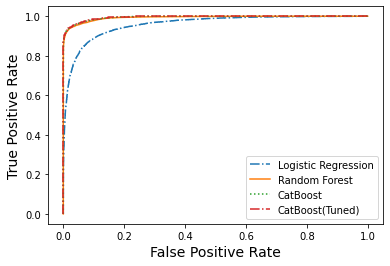

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


#model_cat = CatBoostClassifier().fit(X_train, y_train)
probs_cat = model_cat.predict_proba(X_test)[:, 1]

#model_rf = RandomForestClassifier().fit(X_train, y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

#model_lr = LogisticRegression().fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

probs_cat2= tuned_cat.predict_proba(X_test)[:, 1]

y_test_int = y_test.replace({'Good': 1, 'Bad': 0})


from sklearn.metrics import roc_auc_score, roc_curve
auc_cat = roc_auc_score(y_test_int, probs_cat)
fpr_cat, tpr_cat, thresholds_cat = roc_curve(y_test_int, probs_cat)

auc_lr = roc_auc_score(y_test_int, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_int, probs_lr)

auc_rf = roc_auc_score(y_test_int, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_int, probs_rf)

auc_cat2 = roc_auc_score(y_test_int, probs_cat2)
fpr_cat2, tpr_cat2, thresholds_cat2 = roc_curve(y_test_int, probs_cat2)


plt.plot(fpr_lr, tpr_lr, linestyle='-.',label=f'Logistic Regression')
plt.plot(fpr_rf, tpr_rf, linestyle='-',label=f'Random Forest')
plt.plot(fpr_cat, tpr_cat, linestyle=':',label=f'CatBoost')
plt.plot(fpr_cat2, tpr_cat2, linestyle='-.',label=f'CatBoost(Tuned)')
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

## 10. Feature Importance

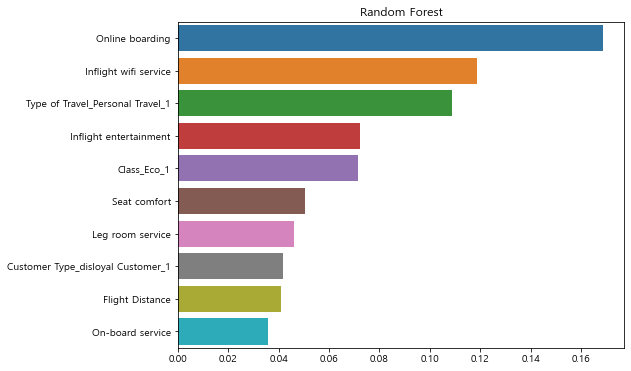

In [25]:
ft_importance_values = model_rf.feature_importances_
plt.rcParams['font.family'] = 'Malgun Gothic'
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top10 = ft_series.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
sns.barplot(x=ft_top10, y=ft_top10.index)
plt.title('Random Forest')
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'

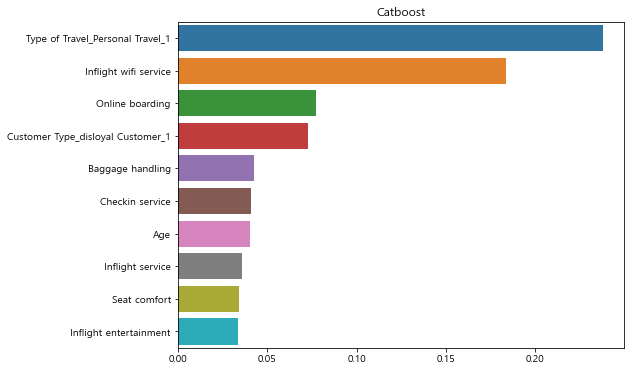

In [26]:
ft_importance_values = model_cat.feature_importances_
plt.rcParams['font.family'] = 'Malgun Gothic'
ft_series = pd.Series(ft_importance_values/100, index = X_train.columns)
ft_top10 = ft_series.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
sns.barplot(x=ft_top10, y=ft_top10.index)
plt.title('Catboost')
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'

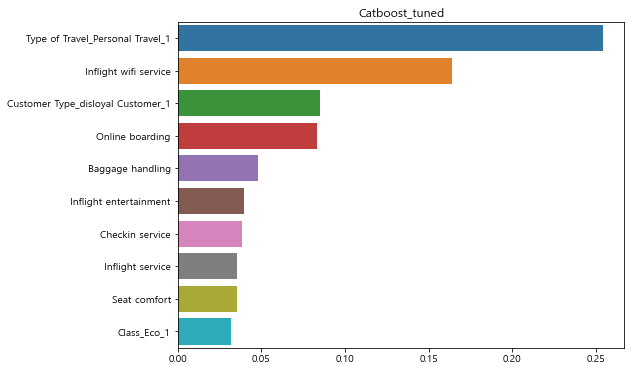

In [27]:
ft_importance_values = tuned_cat.feature_importances_
plt.rcParams['font.family'] = 'Malgun Gothic'
ft_series = pd.Series(ft_importance_values/100, index = X_train.columns)
ft_top10 = ft_series.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
sns.barplot(x=ft_top10, y=ft_top10.index)
plt.title('Catboost_tuned')
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'

## 11. Coefficient Plot (Logistic Regression)

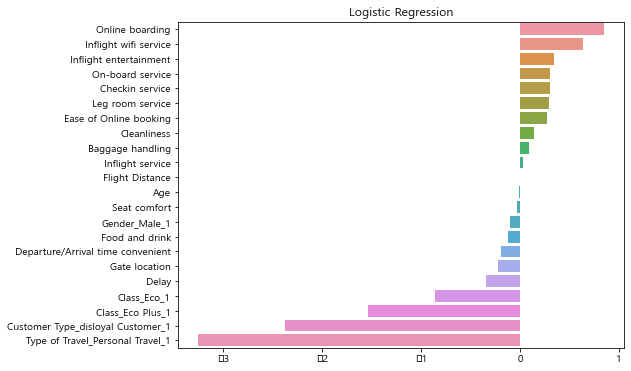

In [28]:
plt.rcParams['font.family'] = 'Malgun Gothic'
ft_series = pd.Series(model_lr.coef_[0,:], index = X_train.columns)
ft_top30 = ft_series.sort_values(ascending=False)[:30]

plt.figure(figsize=(8,6))
sns.barplot(x=ft_top30, y=ft_top30.index)
plt.title('Logistic Regression')
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'